Chap.20 전이학습으로 성능 극대화

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 이미지 부풀리기/늘리기 (데이터 전처리)
train_data_gn = ImageDataGenerator(rescale=1./255,          # 정규화
                                   horizontal_flip=True,    # 수평 뒤집기
                                   width_shift_range=.1,    # 수평 이동
                                   height_shift_range=.1,   # 수직 이동
                                   fill_mode='nearest')     # 빈 공간 채우기

train_gn = train_data_gn.flow_from_directory('data/chap.20/train', target_size=(150,150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.


In [3]:
test_data_gn = ImageDataGenerator(rescale=1./255)

test_gn = test_data_gn.flow_from_directory('data/chap.20/test', target_size=(150,150), batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
# CNN 모델 만들기

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation (Activation)     (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [5]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),metrics=['accuracy'])

earlystopping = EarlyStopping(patience=5)

history = model.fit(train_gn, epochs=200,validation_data=test_gn ,callbacks=[earlystopping], validation_steps=10)


Epoch 1/200
32/32 [==============================] - 5s 114ms/step - loss: 0.7052 - accuracy: 0.4250 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 3s 90ms/step - loss: 0.6949 - accuracy: 0.4688 - val_loss: 0.6913 - val_accuracy: 0.6600
Epoch 3/200
32/32 [==============================] - 3s 101ms/step - loss: 0.6892 - accuracy: 0.5750 - val_loss: 0.6861 - val_accuracy: 0.5400
Epoch 4/200
32/32 [==============================] - 3s 96ms/step - loss: 0.6910 - accuracy: 0.5375 - val_loss: 0.6917 - val_accuracy: 0.4600
Epoch 5/200
32/32 [==============================] - 3s 95ms/step - loss: 0.6867 - accuracy: 0.5688 - val_loss: 0.6655 - val_accuracy: 0.6000
Epoch 6/200
32/32 [==============================] - 3s 100ms/step - loss: 0.6853 - accuracy: 0.5750 - val_loss: 0.6666 - val_accuracy: 0.5200
Epoch 7/200
32/32 [==============================] - 3s 94ms/step - loss: 0.6718 - accuracy: 0.5938 - val_loss: 0.6576 - val_accuracy: 0.5000
Epo

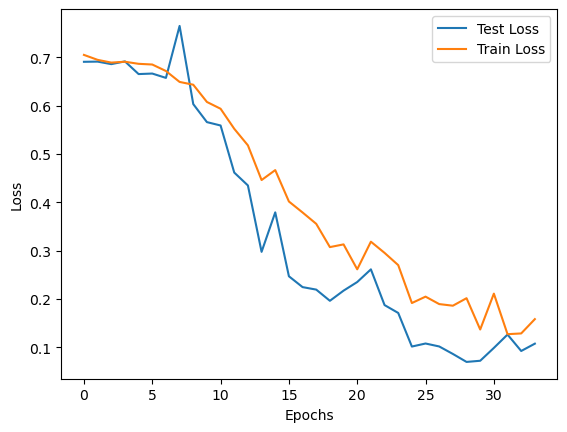

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='Test Loss')
plt.plot(x_len, y_loss, label='Train Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()